## Simulação e Análise de Espectros de Energia Nuclear com Detecção Automática e Ajuste de Picos Gaussianos

### Parte 1: Gerador de dados ruidosos

In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Parâmetros da simulação:

# definimos a resolução do detector, como sera dividido o espectro
N_CANAIS = 1000 #(cada bin relacionado com a energia)

# eixo de energia (x)
EIXO_ENERGIA = np.linspace(0, 1000, N_CANAIS) #(canal 0 corresponde a energia 0,
#canal 1 corresponde a energia 1, etc...)

# gerando números aleatórios:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# o ruído de fundo se assemelha a um decaimento exponencial A*e^(-cteE)
# parâmetros do fundo:
FUNDO_AMP = 600
FUNDO_DECAI = 0.05

# picos:
PARAMETROS_PICOS = [
    {'amp' : 400, 'centro': 250, 'sigma':10},
    {'amp' : 200, 'centro': 600, 'sigma':15},
    {'amp' : 100, 'centro': 750, 'sigma':8}

]


In [25]:
# Definindo funções

def fundo_exponencial(eixo_energia, amp, decai):
    fundo_puro = amp*np.exp(-eixo_energia*decai)
    # Usamos um fundo Poissiano para a contagem
    fundo_com_ruido = np.random.poisson(fundo_puro)
    return fundo_com_ruido

# gera um pico em ruido 
def gerar_pico_gaussiano(eixo_energia, amp, centro, sigma):
     return amp * np.exp(-((eixo_energia - centro)**2) / (2 * sigma**2))


In [26]:
# definindo o espectro completo
def simular_espectro(eixo_energia, params_fundo, lista_picos):
     fundo = fundo_exponencial(eixo_energia, **params_fundo) #gera o fundo
     espectro_final = fundo 
     # 3. Adiciona cada pico da lista ao espectro total
     for  params_pico in lista_picos:
        pico = gerar_pico_gaussiano(eixo_energia, **params_pico)
        espectro_final = espectro_final + pico
     return espectro_final

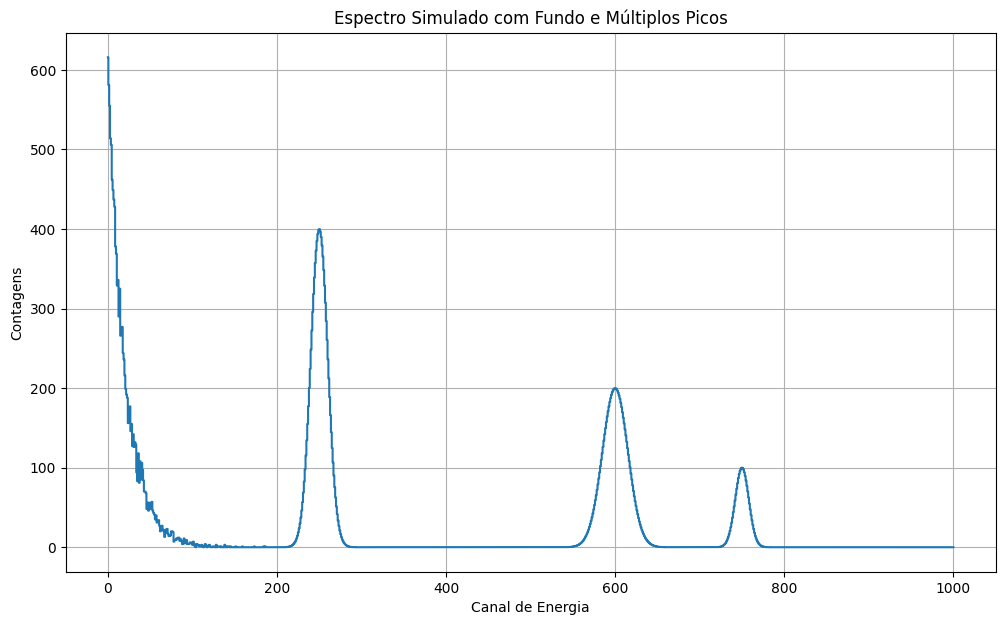

In [28]:
#teste chamando a função
espectro_simulado = simular_espectro(
    EIXO_ENERGIA,
    {'amp': FUNDO_AMP, 'decai': FUNDO_DECAI},
    PARAMETROS_PICOS
)
# Plota o resultado para verificar
plt.figure(figsize=(12, 7))
plt.plot(EIXO_ENERGIA, espectro_simulado, drawstyle='steps-mid')
plt.title('Espectro Simulado com Fundo e Múltiplos Picos')
plt.xlabel('Canal de Energia')
plt.ylabel('Contagens')
plt.grid(True)
plt.show()

# Cria um DataFrame do Pandas para organizar os dados
df_espectro = pd.DataFrame({
    'Energia': EIXO_ENERGIA,
    'Contagens': espectro_simulado
})

# Salva em Excel e JSON
#df_espectro.to_excel("espectro_simulado.xlsx", index=False)
#df_espectro.to_json("espectro_simulado.json", orient='records')


